# This Is My 21. Sleep Health and Lifestyle project.

# Import Required Libraries

In [1]:
# Data handling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing & splitting
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

# Evaluation metrics
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,
    classification_report,confusion_matrix,auc,roc_auc_score, roc_curve
)

# Classifier Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# XGBoost
from xgboost import XGBClassifier
# Warnings
import warnings
warnings.filterwarnings("ignore")

# Save the model
import joblib

# Load Dataset

In [2]:
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


# Check for duplicated rows

In [4]:
print(" Number of duplicated rows:", data.duplicated().sum())

 Number of duplicated rows: 0


# Check for duplicated columns

In [5]:
print(" Number of duplicated columns:", data.columns.duplicated().sum())

 Number of duplicated columns: 0


# Check for object unique number

In [6]:
cat = data.select_dtypes(include='object')
for i in cat.columns:
    print(f"{i}")
    print(f"{cat[i].nunique()}")

Gender
2
Occupation
11
BMI Category
4
Blood Pressure
25
Sleep Disorder
2


# Check for object unique

In [7]:
for i in cat.columns:
    print(f"{i}")
    print(f"{cat[i].unique()}")

Gender
['Male' 'Female']
Occupation
['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
BMI Category
['Overweight' 'Normal' 'Obese' 'Normal Weight']
Blood Pressure
['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']
Sleep Disorder
[nan 'Sleep Apnea' 'Insomnia']


# Remove extra spaces and unify capitalization

In [8]:
data['BMI Category'] = data['BMI Category'].astype(str).str.strip().str.title()

# Replace similar terms with one standard label

In [9]:
data['BMI Category'] = data['BMI Category'].replace({
    'Normal Weight': 'Normal'   # merge "Normal Weight" into "Normal"
})

# Check final unique values

In [10]:
print(data['BMI Category'].unique())

['Overweight' 'Normal' 'Obese']


# Clean & Split Blood Pressure Column

In [11]:
import re
def clean_bp(bp):
    if pd.isna(bp):
        return (np.nan, np.nan)
    bp = str(bp).strip()
    match = re.findall(r'(\d+)[^\d]+(\d+)', bp)
    if match:
        return tuple(map(int, match[0]))
    else:
        return (np.nan, np.nan)

# Apply and create new columns

In [12]:
data[['Systolic_BP', 'Diastolic_BP']] = data['Blood Pressure'].apply(lambda x: pd.Series(clean_bp(x)))

# Display Final Result

In [13]:
data[['Systolic_BP', 'Diastolic_BP']].head()

,Systolic_BP,Diastolic_BP
0,126,83
1,125,80
2,125,80
3,140,90
4,140,90


# Drop useless columns

In [14]:
data.drop(['Person ID','Blood Pressure','Sleep Disorder'],axis=1,inplace=True)
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic_BP,Diastolic_BP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90


In [15]:
data['Quality of Sleep'].value_counts()

Quality of Sleep
8    109
6    105
7     77
9     71
5      7
4      5
Name: count, dtype: int64

# Convert numeric sleep scores into categorical labels

In [16]:
def categorize_sleep_quality(score):
    if score <= 5:
        return 'Poor'
    elif score <= 7:
        return 'Average'
    else:
        return 'Good'

data['Sleep_Quality_Class'] = data['Quality of Sleep'].apply(categorize_sleep_quality)

# Map categories to numeric codes

In [17]:
data['Sleep_Quality_Class'] = data['Sleep_Quality_Class'].map({
    'Poor': 0,
    'Average': 1,
    'Good': 2
})

# Check for value count

In [18]:
data['Sleep_Quality_Class'].value_counts()

Sleep_Quality_Class
1    182
2    180
0     12
Name: count, dtype: int64

# Maximum value counts

In [19]:
max_count = data['Sleep_Quality_Class'].value_counts().max()
max_count

182

# Create Balance data

In [20]:
upsampled_list = []

for cls in data['Sleep_Quality_Class'].unique():
    cls_data = data[data['Sleep_Quality_Class'] == cls]
    cls_upsampled = resample(
        cls_data,
        replace=True,
        n_samples=max_count,
        random_state=42
    )
    upsampled_list.append(cls_upsampled)

data_balanced = pd.concat(upsampled_list)

data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# After Balancing

In [21]:
print(data_balanced['Sleep_Quality_Class'].value_counts())

Sleep_Quality_Class
0    182
1    182
2    182
Name: count, dtype: int64


# Swape Variable

In [22]:
data = data_balanced
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   546 non-null    object 
 1   Age                      546 non-null    int64  
 2   Occupation               546 non-null    object 
 3   Sleep Duration           546 non-null    float64
 4   Quality of Sleep         546 non-null    int64  
 5   Physical Activity Level  546 non-null    int64  
 6   Stress Level             546 non-null    int64  
 7   BMI Category             546 non-null    object 
 8   Heart Rate               546 non-null    int64  
 9   Daily Steps              546 non-null    int64  
 10  Systolic_BP              546 non-null    int64  
 11  Diastolic_BP             546 non-null    int64  
 12  Sleep_Quality_Class      546 non-null    int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 55.6+ KB


# Heatmap

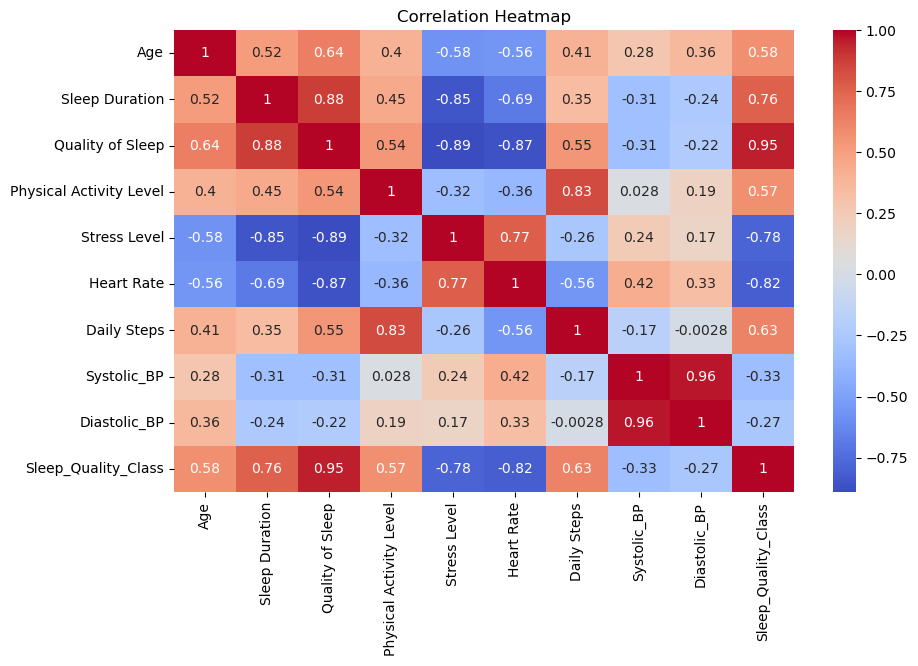

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Encoding

In [24]:
odj_col = data.select_dtypes(include='object')
le = LabelEncoder()
for i in odj_col:
    data[i] = le.fit_transform(data[i])

data.head(2)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic_BP,Diastolic_BP,Sleep_Quality_Class
0,0,34,7,5.8,4,32,8,2,81,5200,131,86,0
1,1,31,1,7.8,7,75,6,0,70,8000,120,80,1


# Scale

In [25]:
sc = StandardScaler()
data[['Daily Steps']] = sc.fit_transform(data[['Daily Steps']])
data.head(2)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic_BP,Diastolic_BP,Sleep_Quality_Class
0,0,34,7,5.8,4,32,8,2,81,-0.435229,131,86,0
1,1,31,1,7.8,7,75,6,0,70,1.076307,120,80,1


# Now define features and target

In [26]:
X = data.drop(['Sleep_Quality_Class', 'Quality of Sleep'], axis=1)
y = data['Sleep_Quality_Class']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Preprocessing Pipeline

In [27]:
from sklearn.pipeline import Pipeline
preprocessor = Pipeline ([
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

# Define models & parameter grids for classification

In [28]:
models = {
    # -------------------------------
    "Logistic Regression": {
        "model": LogisticRegression(solver='lbfgs', max_iter=500, random_state=42),
        "param_grid": {
            "C": [0.1, 1, 10],
            "penalty": ['l2']
        }
    },
    # -------------------------------
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "param_grid": {
            "max_depth": [3, 5, 10, None],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    },
    # -------------------------------
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "param_grid": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2]
        }
    },
    # -------------------------------
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "param_grid": {
            "n_estimators": [100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5]
        }
    },
    # -------------------------------
    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=42),
        "param_grid": {
            "n_estimators": [50, 100, 200],
            "learning_rate": [0.01, 0.1, 1.0]
        }
    },
    # -------------------------------
    "Extra Trees": {
        "model": ExtraTreesClassifier(random_state=42),
        "param_grid": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2]
        }
    },
    # -------------------------------
    "K-Nearest Neighbors": {
        "model": KNeighborsClassifier(),
        "param_grid": {
            "n_neighbors": [3, 5, 7, 9],
            "weights": ["uniform", "distance"],
            "p": [1, 2]  # Manhattan (L1) or Euclidean (L2)
        }
    },
    # -------------------------------
    "MLP Classifier": {
        "model": MLPClassifier(random_state=42),
        "param_grid": {
            "hidden_layer_sizes": [(50,), (100,)],
            "activation": ["relu", "tanh"],
            "solver": ["adam"],
            "max_iter": [200]
        }
    },
    # -------------------------------
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
        "param_grid": {
            "n_estimators": [100, 200],
            "max_depth": [3, 5, 7],
            "learning_rate": [0.01, 0.1, 0.2],
            "subsample": [0.8, 1.0],
            "colsample_bytree": [0.8, 1.0]
        }
    }
}

print(f" Total Models Loaded: {len(models)}")

 Total Models Loaded: 9


# Run GridSearchCV for each classification model

In [29]:
results = []
best_score = -float('inf')
best_model = None
best_name = None

for name, mp in models.items():
    print(f"\n Running GridSearchCV for {name}...")
    grid = GridSearchCV(mp['model'], param_grid=mp['param_grid'], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    y_pred = grid.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

    print(f"{name} Best CV Score (Accuracy): {grid.best_score_:.4f}")
    print(f"{name} Best Params: {grid.best_params_}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    if grid.best_score_ > best_score:
        best_score = grid.best_score_
        best_model = grid.best_estimator_
        best_name = name

# ----------------------------------------
# Summary Results
# ----------------------------------------
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print("\n Summary Results:")
print(results_df)

print(f"\n Best Model: {best_name}")
print(f" Best CV Score (Accuracy): {best_score:.4f}")


 Running GridSearchCV for Logistic Regression...
Logistic Regression Best CV Score (Accuracy): 0.9885
Logistic Regression Best Params: {'C': 1, 'penalty': 'l2'}
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.98      0.99        41
           2       1.00      1.00      1.00        35

    accuracy                           0.99       110
   macro avg       0.99      0.99      0.99       110
weighted avg       0.99      0.99      0.99       110

[[34  0  0]
 [ 1 40  0]
 [ 0  0 35]]

 Running GridSearchCV for Decision Tree...
Decision Tree Best CV Score (Accuracy): 0.9885
Decision Tree Best Params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00      

# confusion matrix for best model

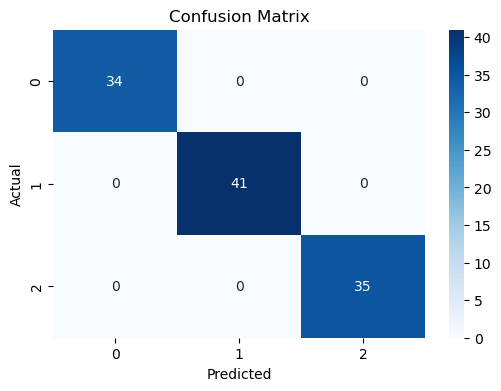

In [30]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Save the model

In [31]:
feature_columns = X.columns.to_list()
joblib.dump(feature_columns,'21.Sleep Health and Lifestyle.joblib')

['21.Sleep Health and Lifestyle.joblib']

In [32]:
joblib.dump(best_model,'bestmodel 21.Sleep Health and Lifestyle.joblib')

['bestmodel 21.Sleep Health and Lifestyle.joblib']

# If you have any suggestions, please DM me.
# Even a small message from you can make a big impact on my career

#### I am Arun